In [27]:
%%bash
strace -tt -T -r -y -o logs/view3.st python src/mmarrays.py 100000

Data size = 819.200 MB
Chunk size = 0.800 MB


In [28]:
from strace_miner.views.v3 import IOMinerV3
from strace_miner.views.v3 import IOLineReaderV3

In [43]:
io_calls = ['read','write']
line_reader = IOLineReaderV3(['/workspaces/',],collapse=False)
#line_reader = IOLineReaderV3(collapse=False)
sta = IOMinerV3(["logs/view3.st",],io_calls,line_reader)
sta.preprocess()
sta.prepare_summaries_and_event_log()
sta.prepare_dfg()

CSV log path: logs/view3.csv


/home/vscode/.local/lib/python3.12/site-packages/pm4py/utils.py:538: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


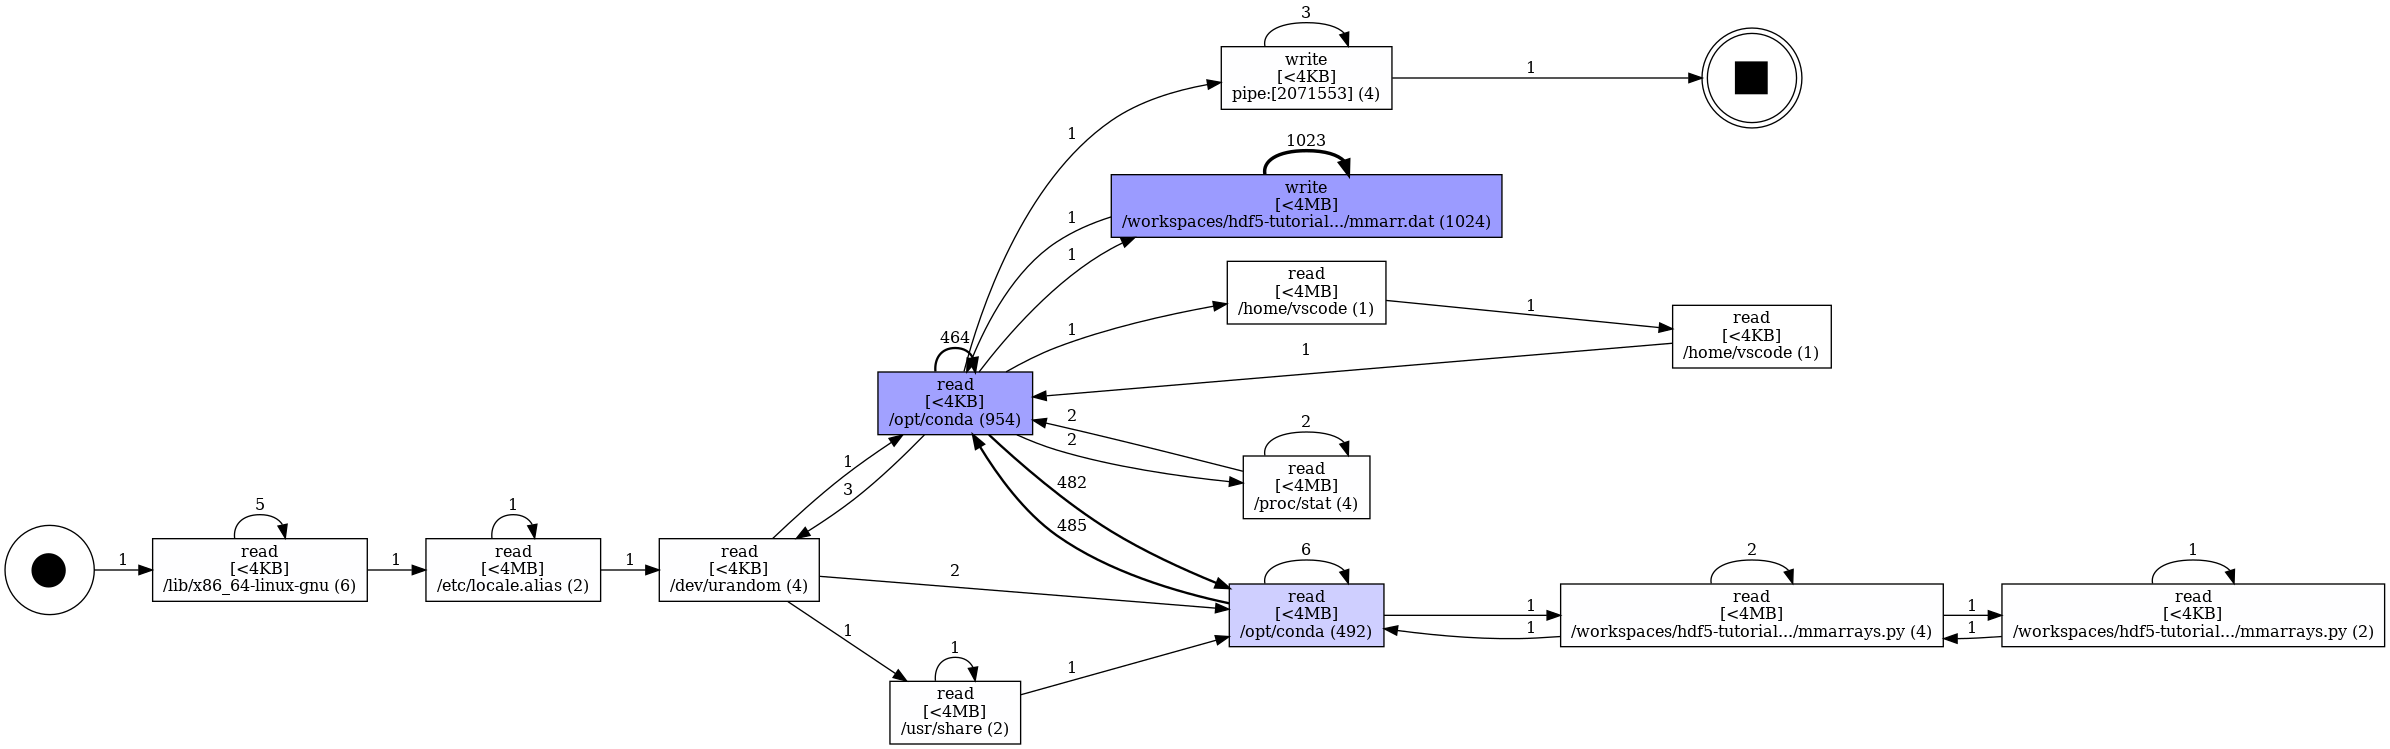

In [44]:
sta.view_dfg()

In [45]:
sta.activities_summary['view3']

,call,duration,percent_total,percent_sys
0,"[read, [<4KB], /dev/urandom]",0.000159,0.005486,0.016042
1,"[read, [<4KB], /home/vscode]",0.000037,0.001277,0.003733
2,"[read, [<4KB], /lib/x86_64-linux-gnu]",0.000335,0.011558,0.033798
3,"[read, [<4KB], /opt/conda]",0.038376,1.324076,3.871764
4,"[read, [<4KB], /workspaces/hdf5-tutorial.../mm...",0.000187,0.006452,0.018866
5,"[read, [<4MB], /etc/locale.alias]",0.000065,0.002243,0.006558
6,"[read, [<4MB], /home/vscode]",0.000059,0.002036,0.005953
7,"[read, [<4MB], /opt/conda]",0.023259,0.802499,2.346606
8,"[read, [<4MB], /proc/stat]",0.000180,0.006210,0.018160
9,"[read, [<4MB], /usr/share]",0.000063,0.002174,0.006356


#### Arbitrary Command

In [37]:
!strace -tt -T -r -y -o logs/cmd.st lscpu


Architecture:                       x86_64
CPU op-mode(s):                     32-bit, 64-bit
Byte Order:                         Little Endian
Address sizes:                      39 bits physical, 48 bits virtual
CPU(s):                             16
On-line CPU(s) list:                0-15
Thread(s) per core:                 2
Core(s) per socket:                 8
Socket(s):                          1
Vendor ID:                          GenuineIntel
CPU family:                         6
Model:                              154
Model name:                         12th Gen Intel(R) Core(TM) i7-1260P
Stepping:                           3
CPU MHz:                            2496.011
BogoMIPS:                           4992.02
Virtualization:                     VT-x
Hypervisor vendor:                  Microsoft
Virtualization type:                full
L1d cache:                          384 KiB
L1i cache:                          256 KiB
L2 cache:                           10 MiB
L3 cach

In [40]:
io_calls = ['read','write']
line_reader = IOLineReaderV3(collapse=False)
sta = IOMinerV3(["logs/cmd.st",],io_calls,line_reader)
sta.preprocess()
sta.prepare_summaries_and_event_log()
sta.prepare_dfg()

CSV log path: logs/cmd.csv


/home/vscode/.local/lib/python3.12/site-packages/pm4py/utils.py:538: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


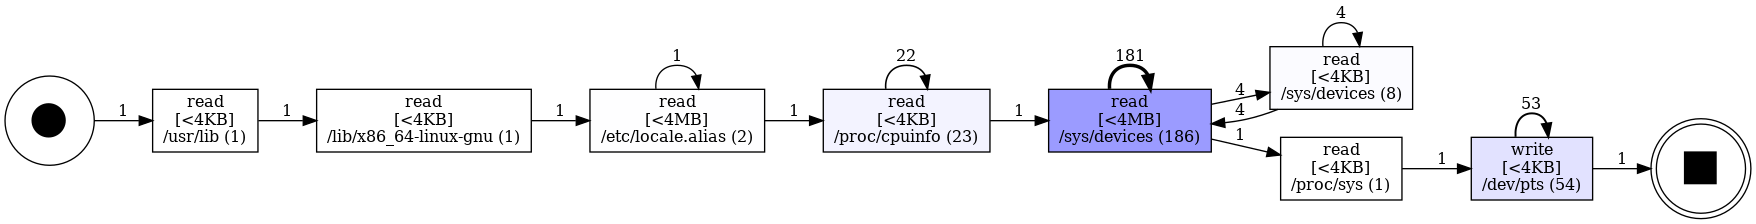

In [41]:
sta.view_dfg()

In [42]:
sta.activities_summary['cmd']

,call,duration,percent_total,percent_sys
0,"[read, [<4KB], /lib/x86_64-linux-gnu]",0.000034,0.023899,0.061428
1,"[read, [<4KB], /proc/cpuinfo]",0.001299,0.913065,2.346926
2,"[read, [<4KB], /proc/sys]",0.000032,0.022493,0.057815
3,"[read, [<4KB], /sys/devices]",0.000320,0.224928,0.578150
4,"[read, [<4KB], /usr/lib]",0.000086,0.060449,0.155378
5,"[read, [<4MB], /etc/locale.alias]",0.000281,0.197515,0.507688
6,"[read, [<4MB], /sys/devices]",0.008026,5.641465,14.500714
7,"[write, [<4KB], /dev/pts]",0.004952,3.480755,8.946864


In [49]:
%%bash
strace -tt -y -r -T ls

16:30:37.613982 (+     0.000000) execve("/bin/ls", ["ls"], 0x7ffeb0d1b4b0 /* 59 vars */) = 0 <0.000520>
16:30:37.614707 (+     0.000701) brk(NULL) = 0x55df56722000 <0.000042>
16:30:37.614965 (+     0.000253) access("/etc/ld.so.preload", R_OK) = -1 ENOENT (No such file or directory) <0.000065>
16:30:37.615255 (+     0.000291) openat(AT_FDCWD, "/etc/ld.so.cache", O_RDONLY|O_CLOEXEC) = 3</etc/ld.so.cache> <0.000159>
16:30:37.615594 (+     0.000335) fstat(3</etc/ld.so.cache>, {st_mode=S_IFREG|0644, st_size=39386, ...}) = 0 <0.000215>
16:30:37.616043 (+     0.000443) mmap(NULL, 39386, PROT_READ, MAP_PRIVATE, 3</etc/ld.so.cache>, 0) = 0x7f55d00fe000 <0.000069>
16:30:37.616216 (+     0.000179) close(3</etc/ld.so.cache>) = 0 <0.000080>
16:30:37.616416 (+     0.000195) openat(AT_FDCWD, "/lib/x86_64-linux-gnu/libselinux.so.1", O_RDONLY|O_CLOEXEC) = 3</lib/x86_64-linux-gnu/libselinux.so.1> <0.000224>
16:30:37.616713 (+     0.000296) read(3</lib/x86_64-linux-gnu/libselinux.so.1>, "\177ELF\2\1\1\0\

-e
00-prepare-eg.ipynb
01-core-view1.ipynb
02-test-view1.ipynb
03-view2.ipynb
04-test-view2.ipynb
05-view3.ipynb
06-test-view3.ipynb
data
logs
src
